# **Heart Attack Analysis and Prediction**

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Information**](#Section41)
  - **4.2** [**Data Statistics**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)
  
**6.** [**Exploratory Data Analysis**](#Section6)<br>

**7.** [**Post Data Processing & Feature Selection**](#Section7)<br>
  - **7.1** [**Post Profiling Report**](#Section72)<br>
  - **7.2** [**Data Preparation**](#Section74)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>

**9.** [**Conclusion**](#Section9)<br>



<a id=section1></a>

---
<a name = Section1></a>
# **1. Introduction**
---
XYZ Healthcare is a Healthcare institution.

- XYZ Healthcare is going to provide early methods to detect heart attacks for their customers.
- The idea is to use data to classify the presence of heart disease in the patient.
- The System uses patient data and gives an early warning to the patient whether he is going to suffer from a heart attack or not .




---
<a name = Section2></a>
# **2. Problem Statement**
---
- Every year about 735,000 people have a heart attack. Of these, 525,000 are a first heart attack and 210,000 happen in people who have already had a heart attack.
- The company wants to create a good data-driven system for predicting heart disease that can improve the entire research and prevention process, making sure that more people can live healthy lives.

**Project Deliverables**
Deliverable: The goal is to predict whether a patient has a heart disease or not..
- Machine Learning Task: Classification
- Target Variable: heart_disease_present(no heart disease present (0) / heart disease present(1))
- Win Condition: N/A (best possible model)



<br> 
<center>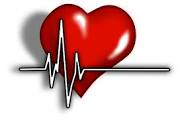</center>



---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [5]:
# !pip install -q datascience                   # Package that is required by pandas profiling
# !pip install -q pandas-profiling              # Library to generate basic statistics about data

<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [6]:
# !pip install -q --upgrade pandas-profiling

<a name = Section33></a>
### **3.3 Importing Libraries**

In [49]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix, classification_report # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LogisticRegression                 # To create the Logistic Regression Model
from sklearn.ensemble import RandomForestClassifier                 # To create the RandomForest Model
from sklearn.tree import DecisionTreeClassifier                     # to create a DecisionTreeclassifier
from sklearn.naive_bayes import GaussianNB                          # To instantiate a Naive Bayes Classifier
from sklearn.model_selection import GridSearchCV                    # To tune the models
#-------------------------------------------------------------------------------------------------------------------------------
import time                                                         # Importing to calculate time
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

<center>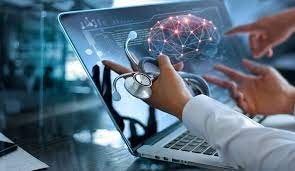</center>

- The train set contains 242 rows and 15 columns and The last column output is the target variable.
- The test set contains 61 rows and 15 columns and The last column output is the target variable.

| **Column Name**														| 	**Description** |
|:--|:--|
| age																	| 	age in years |
| sex																	| 	0 as female, 1 as male |
| chest pain type (4 values)											| 	chest pain type (4 values) |
| resting blood pressure												| 	resting blood pressure |
| serum cholesterol in mg/dl											| 	serum cholesterol in mg/dl |
| thal: 3 = normal; 6 = fixed defect; 7 = reversible defect			| 	results of thallium stress test measuring blood flow to the heart, with possible values |
| fasting blood sugar > 120 mg/dl										| 	fasting blood sugar > 120 mg/dl |
| resting electrocardiographic results (values 0,1,2)					|	resting electrocardiographic results (values 0,1,2) |
| maximum heart rate achieved											|	maximum heart rate achieved (beats per minute) |
| exercise induced angina												|	exercise-induced chest pain (0 as False, 1 as True) |
| number of major vessels (0-3) colored by fluoroscopy				|	number of major vessels (0-3) colored by fluoroscopy |
| oldpeak = ST depression induced by exercise relative to rest		| 	oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms |
| ST segment number of major vessels (0-3) colored by fluoroscopy		| 	the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart Number	Unique identifier heart_disease_present	The label for the voice sample (male or female) |


In [8]:
!unzip "/content/HeartAttack_Analysis.zip"

Archive:  /content/HeartAttack_Analysis.zip
replace heart_test.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace heart_train.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [9]:
# Importing data using pd.read_csv
heart_train = pd.read_excel("heart_train.xlsx")  
heart_test = pd.read_excel("heart_test.xlsx")  

heart_train.head()

,Number,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,132.0,42.0,1.0,1.0,120.0,295.0,0.0,1.0,162.0,0.0,0.0,2.0,0.0,2.0,1.0
1,202.0,58.0,1.0,0.0,150.0,270.0,0.0,0.0,111.0,1.0,0.8,2.0,0.0,3.0,0.0
2,196.0,46.0,1.0,2.0,150.0,231.0,0.0,1.0,147.0,0.0,3.6,1.0,0.0,2.0,0.0
3,75.0,55.0,0.0,1.0,135.0,250.0,0.0,0.0,161.0,0.0,1.4,1.0,0.0,2.0,1.0
4,176.0,60.0,1.0,0.0,117.0,230.0,1.0,1.0,160.0,1.0,1.4,2.0,2.0,3.0,0.0


<a name = Section41></a>
### **4.1 Data Information**

- In this section we will see the **information about the types of features**.

In [11]:
heart_test.head()

,Number,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,179.0,57.0,1.0,0.0,150.0,276.0,0.0,0.0,112.0,1.0,0.6,1.0,1.0,1.0,0.0
1,228.0,59.0,1.0,3.0,170.0,288.0,0.0,0.0,159.0,0.0,0.2,1.0,0.0,3.0,0.0
2,111.0,57.0,1.0,2.0,150.0,126.0,1.0,1.0,173.0,0.0,0.2,2.0,1.0,3.0,1.0
3,246.0,56.0,0.0,0.0,134.0,409.0,0.0,0.0,150.0,1.0,1.9,1.0,2.0,3.0,0.0
4,60.0,71.0,0.0,2.0,110.0,265.0,1.0,0.0,130.0,0.0,0.0,2.0,1.0,2.0,1.0


In [12]:
print("Shape of our heart train data is :", heart_train.shape)
print("Shape of our heart test data is :", heart_test.shape)

Shape of our heart train data is : (242, 15)
Shape of our heart test data is : (61, 15)


- Shape of our health train data is : (242, 15)
- Shape of our health test data is : (61, 15)

In [13]:
heart_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Number    242 non-null    float64
 1   age       242 non-null    float64
 2   sex       242 non-null    float64
 3   cp        242 non-null    float64
 4   trtbps    242 non-null    float64
 5   chol      242 non-null    float64
 6   fbs       242 non-null    float64
 7   restecg   242 non-null    float64
 8   thalachh  242 non-null    float64
 9   exng      242 non-null    float64
 10  oldpeak   242 non-null    float64
 11  slp       242 non-null    float64
 12  caa       242 non-null    float64
 13  thall     242 non-null    float64
 14  output    242 non-null    float64
dtypes: float64(15)
memory usage: 28.5 KB


In [14]:
heart_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Number    61 non-null     float64
 1   age       61 non-null     float64
 2   sex       61 non-null     float64
 3   cp        61 non-null     float64
 4   trtbps    61 non-null     float64
 5   chol      61 non-null     float64
 6   fbs       61 non-null     float64
 7   restecg   61 non-null     float64
 8   thalachh  61 non-null     float64
 9   exng      61 non-null     float64
 10  oldpeak   61 non-null     float64
 11  slp       61 non-null     float64
 12  caa       61 non-null     float64
 13  thall     61 non-null     float64
 14  output    61 non-null     float64
dtypes: float64(15)
memory usage: 7.3 KB


**Observation:**

- There are **no null values present** in heart dataset.

- **sex and output** seems to have **incorrect data type**.

<a name = Section42></a>
### **4.2 Data Statistics**

- In this section we will get **information about the data** and see some observations.

In [15]:
heart_train.describe()

,Number,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,150.185950,54.462810,0.657025,0.991736,130.359504,246.842975,0.128099,0.553719,150.115702,0.314050,1.013223,1.421488,0.681818,2.301653,0.549587
std,86.855884,9.204492,0.475687,1.022533,16.828858,52.795465,0.334893,0.530410,22.352398,0.465098,1.102577,0.607724,0.990620,0.593811,0.498566
min,0.000000,29.000000,0.000000,0.000000,94.000000,131.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.250000,48.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,152.000000,55.500000,1.000000,1.000000,130.000000,239.500000,0.000000,1.000000,154.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,221.750000,61.000000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,165.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,302.000000,77.000000,1.000000,3.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.600000,2.000000,4.000000,3.000000,1.000000


**Observation:**

- The **Average** age in heart dataset is 54. and minimum age is 29 years.

- **Minimum** age is 29 years and **Maximum** age is 77 years.

- **Minimum cholestrol** is 131 mg and **Manimum cholestrol** 564 mg.

In [16]:
heart_test.describe()

,Number,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,154.229508,53.983607,0.786885,0.868852,136.639344,243.967213,0.229508,0.426230,147.786885,0.377049,1.144262,1.311475,0.918033,2.360656,0.524590
std,91.219953,8.641936,0.412907,1.071998,19.457674,48.156677,0.424006,0.498632,25.089251,0.488669,1.374230,0.646555,1.129824,0.683930,0.503539
min,5.000000,34.000000,0.000000,0.000000,102.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,77.000000,46.000000,1.000000,0.000000,124.000000,208.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,146.000000,55.000000,1.000000,0.000000,135.000000,245.000000,0.000000,0.000000,148.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,236.000000,60.000000,1.000000,2.000000,150.000000,273.000000,0.000000,1.000000,168.000000,1.000000,1.900000,2.000000,2.000000,3.000000,1.000000
max,300.000000,71.000000,1.000000,3.000000,200.000000,409.000000,1.000000,1.000000,192.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre-Profiling Report**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [17]:
# need to install for to fix the cat_join error.
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [18]:
# profile = ProfileReport(df = heart_train)
# profile.to_file(output_file = 'Pre Profiling Report.html')
# print('Accomplished!')

**Uncomment and run** the below to generate the profiling report.

In [19]:
# from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
# files.download('Pre Profiling Report.html')      # Use only if you are using Google Colab, otherwise remove it

**Observation:**


- Reports shows that the **number of variables**	in our data is **15**.

- **Number of observations(rows)** is	242

- **Duplicate rows** are **0**

- There is no any **missing data** .

- For full details checkout the report.

In [20]:
#converting data type from float to int in train data
heart_train["sex"] = heart_train["sex"].astype(int)
heart_train["output"] = heart_train["output"].astype(int)

#converting data type from float to int in test data
heart_test["sex"] = heart_test["sex"].astype(int)
heart_test["output"] = heart_test["output"].astype(int)


In [21]:
heart_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Number    242 non-null    float64
 1   age       242 non-null    float64
 2   sex       242 non-null    int64  
 3   cp        242 non-null    float64
 4   trtbps    242 non-null    float64
 5   chol      242 non-null    float64
 6   fbs       242 non-null    float64
 7   restecg   242 non-null    float64
 8   thalachh  242 non-null    float64
 9   exng      242 non-null    float64
 10  oldpeak   242 non-null    float64
 11  slp       242 non-null    float64
 12  caa       242 non-null    float64
 13  thall     242 non-null    float64
 14  output    242 non-null    int64  
dtypes: float64(13), int64(2)
memory usage: 28.5 KB


In [22]:
heart_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Number    61 non-null     float64
 1   age       61 non-null     float64
 2   sex       61 non-null     int64  
 3   cp        61 non-null     float64
 4   trtbps    61 non-null     float64
 5   chol      61 non-null     float64
 6   fbs       61 non-null     float64
 7   restecg   61 non-null     float64
 8   thalachh  61 non-null     float64
 9   exng      61 non-null     float64
 10  oldpeak   61 non-null     float64
 11  slp       61 non-null     float64
 12  caa       61 non-null     float64
 13  thall     61 non-null     float64
 14  output    61 non-null     int64  
dtypes: float64(13), int64(2)
memory usage: 7.3 KB


<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

**<h4>Question: What is the frequency and proportion of Output?</h4>**

In [23]:
heart_train.output.value_counts()

1    133
0    109
Name: output, dtype: int64

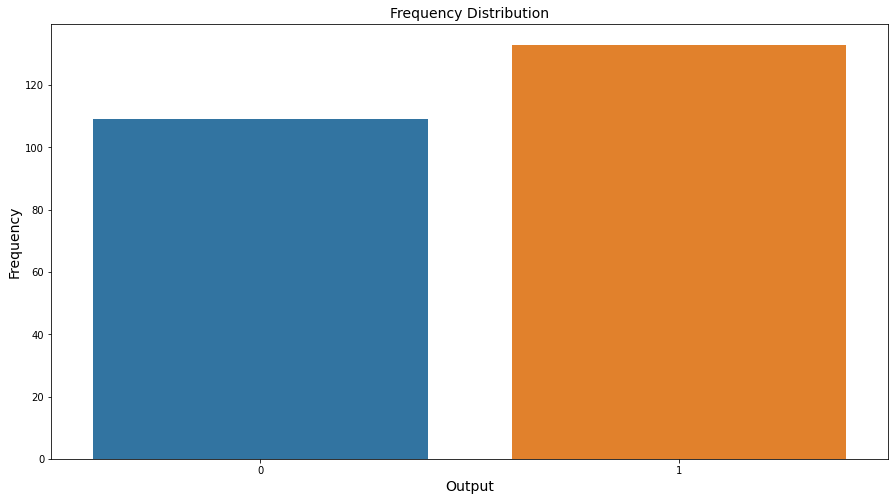

In [24]:
# setting a figure of size of 20 x 7 inches
fig = plt.figure(figsize = [15, 8])

sns.countplot(x = 'output', data = heart_train)

# Adding cosmetics to graph
plt.xlabel(xlabel = 'Output', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution', size = 14)

# Display the plot
plt.show()

**Observation:**

- We can observe that there are higher number of heart attack.

**<h4>Question: Is there any association between Age and Output?</h4>**


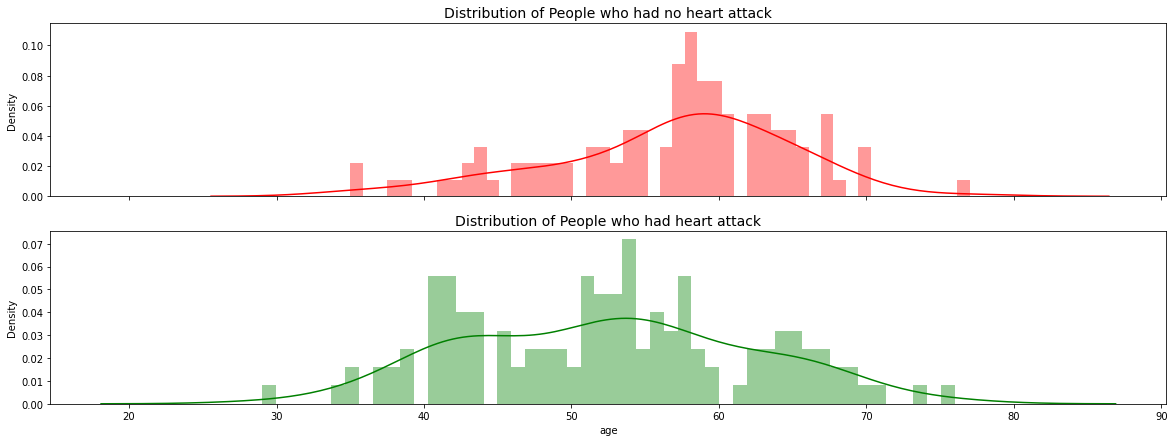

In [25]:
# Slicing data with non-attack
Not_attack = heart_train['age'][heart_train['output'] == 0]

# Slicing data with attack
Attack = heart_train['age'][heart_train['output'] == 1]

# Plotting the distribution of the sliced data
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (20, 7))
sns.distplot(a = Not_attack, bins = 50, ax = ax1, color = 'red')
ax1.set_title(label = 'Distribution of People who had no heart attack', size = 14)
ax1.set_xlabel(xlabel = '')
sns.distplot(a = Attack, bins = 50, ax = ax2, color = 'green')
ax2.set_title(label = 'Distribution of People who had heart attack', size = 14)
plt.show()

**Observation:**

- We can see that the distribution of both the cases are similar.

**<h4>Question: Is there any relation between Response and Accomodation_Type?</h4>**

In [26]:
Not_Attack = heart_train['sex'][heart_train['output'] == 0]
Not_Attack.value_counts()

1    89
0    20
Name: sex, dtype: int64

In [27]:
Attack = heart_train['sex'][heart_train['output'] == 1]
Attack.value_counts()

1    70
0    63
Name: sex, dtype: int64

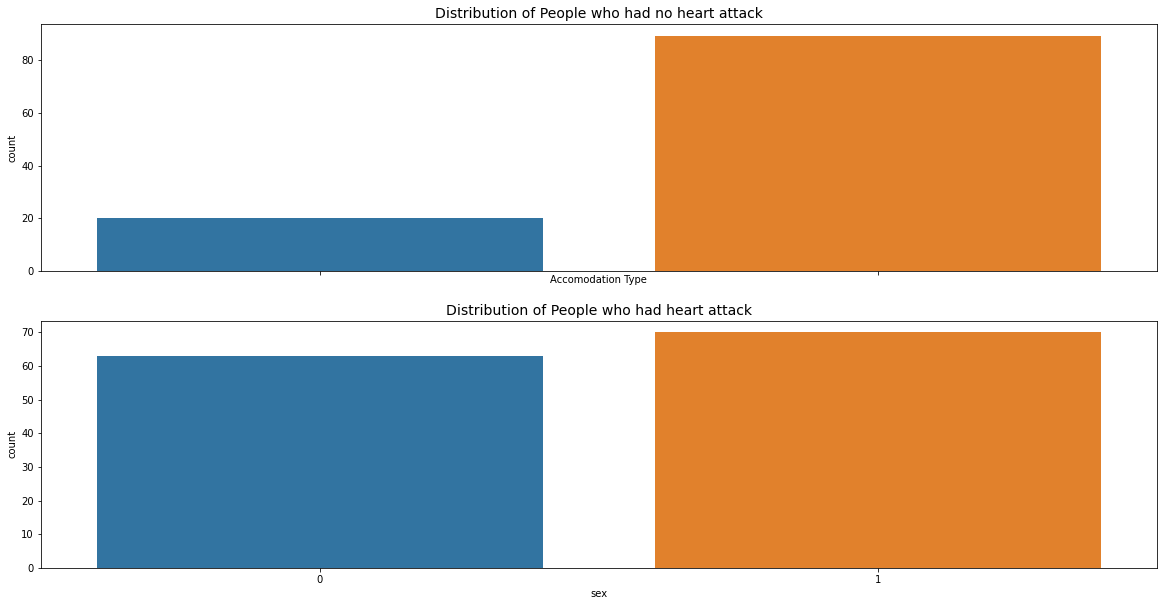

In [28]:
# Slicing data with non-responded
Not_attack = heart_train['sex'][heart_train['output'] == 0]

# Slicing data with responded
attack = heart_train['sex'][heart_train['output'] == 1]

fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (20, 10))
sns.countplot(Not_attack,ax=ax1)
ax1.set_title(label = 'Distribution of People who had no heart attack', size = 14)
ax1.set_xlabel(xlabel = 'Accomodation Type')
sns.countplot( attack,ax=ax2)
ax2.set_title(label = 'Distribution of People who had heart attack', size = 14)
plt.show()

**Observation:**

- We can **observe** most Male had heart attack as compare to Female.

**<h4>Question: Is there any relation between Reco_Policy_Premium and Reco_Insurance_TypeReco_Policy_Premium?</h4>**

In [29]:
heart_train[['age','sex']].groupby(by = 'sex').describe()

age                                                   
     count       mean       std   min   25%   50%   75%   max
sex                                                          
0     83.0  55.722892  9.202748  35.0  50.0  57.0  63.0  76.0
1    159.0  53.805031  9.165481  29.0  47.0  55.0  60.0  77.0

**Observation:**

- We can **observe** that male count is higher than female count.

**<h4>Question: Is there any outlier in policy data?</h4>**

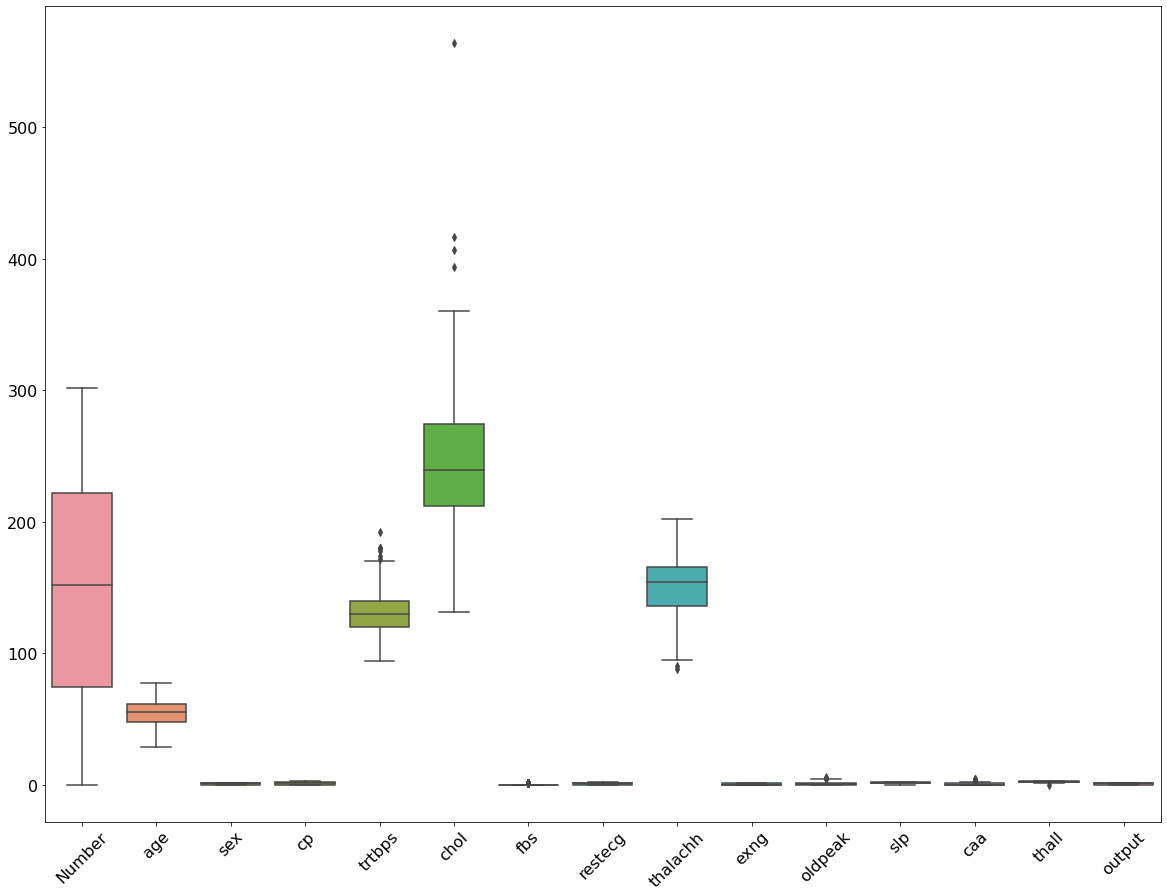

In [30]:
plt.figure(figsize=(20,15))

sns.boxplot(data=heart_train)

plt.xticks(fontsize=16 ,rotation=45)
plt.yticks(fontsize=16)

plt.show()

<a name = Section7></a>

---
# **7. Post Data Processing & Feature Selection**
---


Text(0.5, 1.0, 'Correlation between features')

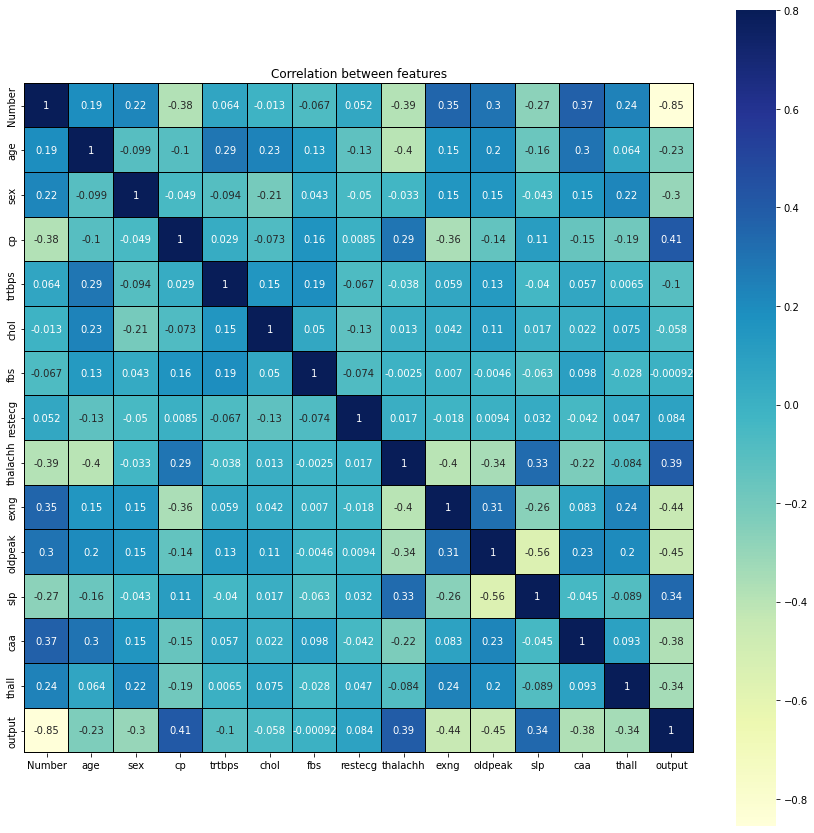

In [31]:
corr = heart_train.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

<a name = Section72></a>
### **7.1 Post-Profiling Report**

> Indented block



In [32]:
# profile = ProfileReport(df = heart_train_df)
# profile.to_file(output_file = 'Pre Profiling Report.html')
# print('Accomplished!')

In [33]:
# from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
# files.download('Pre Profiling Report.html')      # Use only if you are using Google Colab, otherwise remove it

**Observation:**


- For full details after the data processing checkout the report.

<a name = Section74></a>
### **7.2 Data Preparation**

- Now we will **split** our **data** in **training** and **testing** part for further development.

In [34]:
X = heart_train.drop('output',axis = 1)
y = heart_train['output']

In [35]:
# split  data into training and testing sets of 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [36]:
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (193, 14) (193,)
Testing Data Shape: (49, 14) (49,)


In [37]:
y_test.value_counts()

1    27
0    22
Name: output, dtype: int64

<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will use different **models** using input features and **tune** our **model if required**.

- Then we will **analyze the results** obtained and **make our observation**.

- For **evaluation purpose** we will **focus** on **Accuracy**, also we will check for **Precision**, **Recall**, **F1-Score**, and **Precision-Recall Score**.



<a name = Section81></a>

## **8.1 Logistic Regression - Baseline Model**

In [50]:
# Instantiating various classifiers
clfs = [RandomForestClassifier(random_state=0, class_weight='balanced'),
        LogisticRegression(random_state=0), GaussianNB()]

for clf in clfs:
  # Extracting model name
  model_name = type(clf).__name__

  start_time = time.time()

  # Fit the model on train data
  clf.fit(X_train, y_train)

  # Calculating evaluated time
  evaluated_time = time.time()-start_time

  # Make predictions using test data
  y_pred_train = clf.predict(X_train)

  # Make predictions using test data
  y_pred = clf.predict(X_test)

  # Calculate the train accuracy of the model
  clf_train_accuracy = accuracy_score(y_train, y_pred_train)

  # Calculate the test accuracy of the model
  clf_accuracy = accuracy_score(y_test, y_pred)

  # Display the accuracy of the model
  print('Performance Metric of', model_name, ':')
  print('Time taken for tuning', model_name ,' is: ', np.round(evaluated_time, 2), 'sec')
  print('[Train Accuracy]:', clf_train_accuracy)
  print('[Test Accuracy]:', clf_accuracy)
  print('----------------------------------------\n')

Performance Metric of RandomForestClassifier :
Time taken for tuning RandomForestClassifier  is:  0.1 sec
[Train Accuracy]: 1.0
[Test Accuracy]: 1.0
----------------------------------------

Performance Metric of LogisticRegression :
Time taken for tuning LogisticRegression  is:  0.02 sec
[Train Accuracy]: 1.0
[Test Accuracy]: 1.0
----------------------------------------

Performance Metric of GaussianNB :
Time taken for tuning GaussianNB  is:  0.01 sec
[Train Accuracy]: 0.9585492227979274
[Test Accuracy]: 0.9795918367346939
----------------------------------------



In [39]:
rf= RandomForestClassifier(random_state=0, class_weight='balanced')
rf.fit(X_train, y_train)
y_train_rf_pred = rf.predict(X_train)
y_rf_test_pred= rf.predict(X_test)
print('**** Training Classification Report ****')
print(classification_report(y_train, y_train_rf_pred))
print('**** Testing Classification Report ****')
print(classification_report(y_test, y_rf_test_pred))

**** Training Classification Report ****
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00       106

    accuracy                           1.00       193
   macro avg       1.00      1.00      1.00       193
weighted avg       1.00      1.00      1.00       193

**** Testing Classification Report ****
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        27

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49



**Observation**: RandomForest and Logistic Regression looks better model than Gaussian Naive Bayes. so we will use the RandomForest for final submission on unseen test data.

In [40]:
heart_test.head()

,Number,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,179.0,57.0,1,0.0,150.0,276.0,0.0,0.0,112.0,1.0,0.6,1.0,1.0,1.0,0
1,228.0,59.0,1,3.0,170.0,288.0,0.0,0.0,159.0,0.0,0.2,1.0,0.0,3.0,0
2,111.0,57.0,1,2.0,150.0,126.0,1.0,1.0,173.0,0.0,0.2,2.0,1.0,3.0,1
3,246.0,56.0,0,0.0,134.0,409.0,0.0,0.0,150.0,1.0,1.9,1.0,2.0,3.0,0
4,60.0,71.0,0,2.0,110.0,265.0,1.0,0.0,130.0,0.0,0.0,2.0,1.0,2.0,1


In [42]:
ht= heart_test.drop('output', axis=1)

In [43]:
ht.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Number    61 non-null     float64
 1   age       61 non-null     float64
 2   sex       61 non-null     int64  
 3   cp        61 non-null     float64
 4   trtbps    61 non-null     float64
 5   chol      61 non-null     float64
 6   fbs       61 non-null     float64
 7   restecg   61 non-null     float64
 8   thalachh  61 non-null     float64
 9   exng      61 non-null     float64
 10  oldpeak   61 non-null     float64
 11  slp       61 non-null     float64
 12  caa       61 non-null     float64
 13  thall     61 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 6.8 KB


In [44]:
y_pred_final = rf.predict(ht)

In [48]:
submission = pd.DataFrame({'Number': ht['Number'], 'output': y_pred_final})
submission.to_csv('Heartattack_submission.csv', index=False, header=None)

In [47]:
submission.head(10)
# print(submission.Response.value_counts())

,Number,output
0,179.0,0
1,228.0,0
2,111.0,1
3,246.0,0
4,60.0,1
5,9.0,1
6,119.0,1
7,223.0,0
8,268.0,0
9,33.0,1


<a name = Section101></a>
### **9. Conclusion**

- We have learned the **working** of **RandomForest, LogisticRegression and Gaussian NaiveBayes** as a **classifier**.

- We have performed an **in-depth analysis** to extract important information regarding the **features** **concerning** **Heart attack or not as output**.

- We **trained different classifiers** and **compared** their **performance**.

- Now we can **use RandomForest and Logistic** of these models in **production** and **monitor** the prediction **results** to **identify** the **best model** in realtime.